
# Solution for Assignment 3

# Team J

1. Aishwarya Ravichandran
2. Dhanush Aditya
3. Hardik Bishnoi

# Reading the JSON file 

In [4]:
import pandas as pd

df_gaming_reviews = pd.read_json('/Users/aishwaryaravichandran/Documents/nlp/nlp_assignment_0_group_work/CS6120/Assignments/A3/data/reviews_video_games.jsonl', lines=True)
df_gaming_meta = pd.read_json('/Users/aishwaryaravichandran/Documents/nlp/nlp_assignment_0_group_work/CS6120/Assignments/A3/data/meta_video_games.jsonl', lines=True)


# Solving the class imbalance issue by picking equal records from 4 different ratings

In [5]:
overall_5_df = df_gaming_reviews[df_gaming_reviews['rating'] == 5]
overall_4_df = df_gaming_reviews[df_gaming_reviews['rating'] == 4]
overall_2_df = df_gaming_reviews[df_gaming_reviews['rating'] == 2]
overall_1_df = df_gaming_reviews[df_gaming_reviews['rating'] == 1]


In [6]:
overall_5_df = overall_5_df.head(52500)
overall_4_df = overall_4_df.head(52500)
overall_2_df = overall_2_df.head(52500)
overall_1_df = overall_1_df.head(52500)

# Shuffling the dataset

In [7]:
import pandas as pd
import numpy as np

combined_df = pd.concat([overall_5_df, overall_4_df, overall_2_df, overall_1_df], ignore_index=True)

combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Printing the dataset

In [8]:
print(combined_df)

        rating                                              title  \
0            1                                      Buyer beware.   
1            1                                 Not worth the buy.   
2            4                                     Eh, It's fine.   
3            5                             How it was meant to be   
4            2                 Looks and feels good but that's it   
...        ...                                                ...   
209995       2                                          Two Stars   
209996       4                          great product for PS Vita   
209997       2  Foam ear cups deteriorates and falls off! Mic ...   
209998       2                                      A Big Letdown   
209999       2                         stop working after 8 weeks   

                                                     text images        asin  \
0       Item was re-sold through Amazon’s Warehouse an...     []  B07GQGKZXK   
1       Mul

# Counting the dataset from four different categories and depicting them on a the bar graph

<Axes: xlabel='rating'>

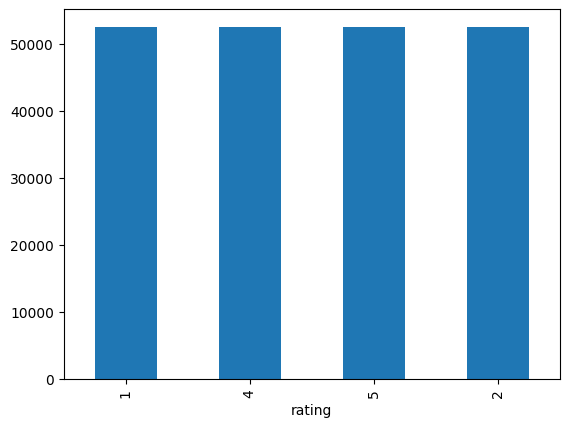

In [9]:
import matplotlib.pyplot as plt

combined_df.rating.value_counts().plot(kind='bar')

# Dropping the irrelevant columns

In [10]:
combined_df.drop(columns=['images'], inplace=True)

# Combining the title and text column

In [11]:
combined_df['review'] = combined_df['title'] + combined_df['text']

# Creating a new column named sentiment based on the rating (4,5 -> positive ; 1,2 -> negative) 

In [12]:
combined_df['sentiment'] = combined_df['rating'].apply(lambda x: 'positive' if x in [4, 5] else 'negative')

# Dropping title and text column

In [13]:
combined_df.drop(columns=['title','text'], inplace=True)

# Printing the resultant dataset

In [14]:
print(combined_df)

        rating        asin parent_asin                       user_id  \
0            1  B07GQGKZXK  B07GQGKZXK  AH6CWNFNTXEBSBRD5FBER47XFOLQ   
1            1  B00CXCCB64  B00C1TTF86  AFRXICBKBV7CEZXOPD4US563O3VQ   
2            4  B07FJP1FMD  B0B28CMVJV  AHYDK5G25Z2WLLF22SBLD2OCBHPQ   
3            5  B00ZS80PC2  B07SRWRH5D  AGASOV6NL4XS4WAD663EXCCTINEA   
4            2  B071HVWD55  B071HVWD55  AH6FPTAFXJHTKK3MCJ3NLHTPBDCQ   
...        ...         ...         ...                           ...   
209995       2  B00GXMDA74  B00GXMDA74  AGQK7ZYJI7Y2PYDOCC4JFRAXCM5Q   
209996       4  B006JKARP8  B006JKARP8  AFUB4MRXTUAADQOJXQFSFSRN5KNA   
209997       2  B0748N6796  B0748N6796  AENQMH2SNRORG6XVQULFEG5FF3XQ   
209998       2  B00002EIZN  B00002EIZN  AGUT7K7IMHDHGOIT6ERVNJZQ575A   
209999       2  B07QBVWFGC  B0BYVN9ZK2  AHLO6S5ODELENFIGRE3XTP3QESMQ   

                     timestamp  helpful_vote  verified_purchase  \
0      2020-01-14 23:21:57.467             0               True   
1

# Printing the column headers

In [17]:
for column in combined_df.columns:
    print(column)

rating
asin
parent_asin
user_id
timestamp
helpful_vote
verified_purchase
review
sentiment


# Printing the most frequently used words in the review section

In [15]:
highlights = combined_df.review

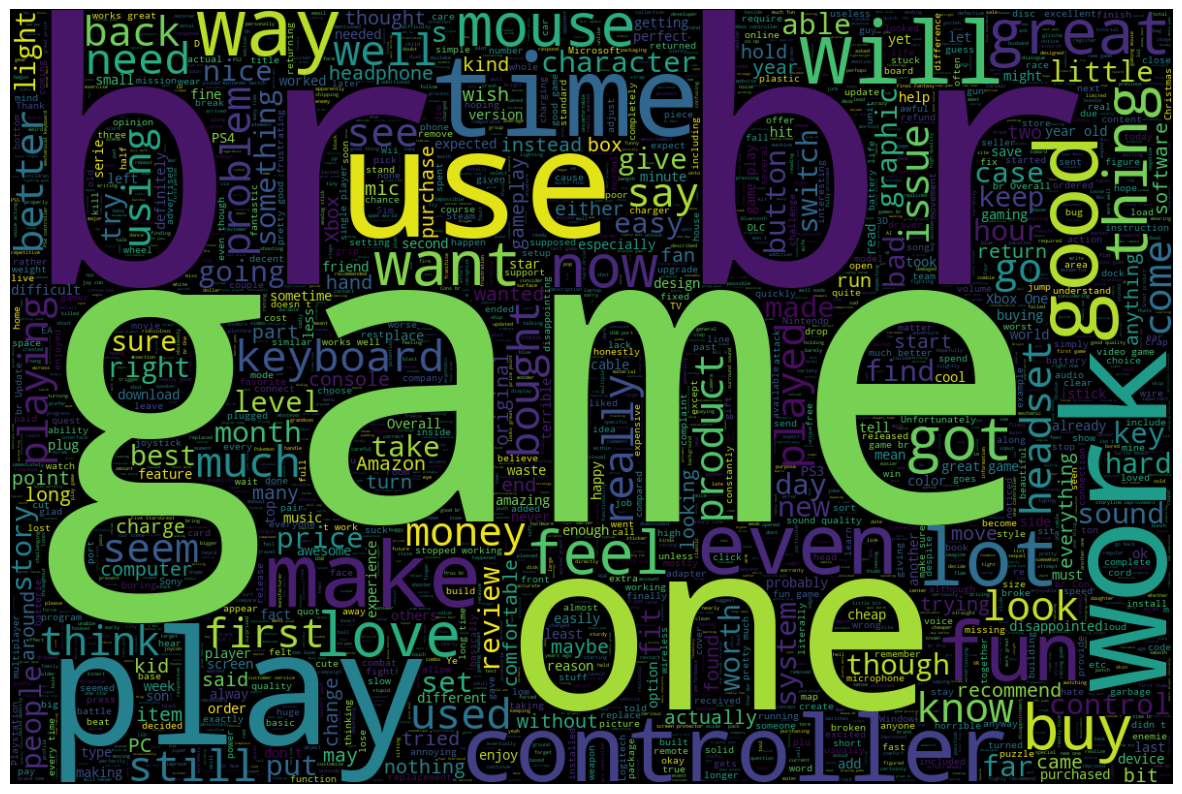

In [16]:
from wordcloud import WordCloud

plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(highlights))
plt.axis("off")
plt.imshow(wordcloud,interpolation = 'bilinear');

# Storing combined_df in review_set

In [20]:
review_set = combined_df

# Displaying the review_set

In [21]:
review_set.head

<bound method NDFrame.head of         rating        asin parent_asin                       user_id  \
0            1  B07GQGKZXK  B07GQGKZXK  AH6CWNFNTXEBSBRD5FBER47XFOLQ   
1            1  B00CXCCB64  B00C1TTF86  AFRXICBKBV7CEZXOPD4US563O3VQ   
2            4  B07FJP1FMD  B0B28CMVJV  AHYDK5G25Z2WLLF22SBLD2OCBHPQ   
3            5  B00ZS80PC2  B07SRWRH5D  AGASOV6NL4XS4WAD663EXCCTINEA   
4            2  B071HVWD55  B071HVWD55  AH6FPTAFXJHTKK3MCJ3NLHTPBDCQ   
...        ...         ...         ...                           ...   
209995       2  B00GXMDA74  B00GXMDA74  AGQK7ZYJI7Y2PYDOCC4JFRAXCM5Q   
209996       4  B006JKARP8  B006JKARP8  AFUB4MRXTUAADQOJXQFSFSRN5KNA   
209997       2  B0748N6796  B0748N6796  AENQMH2SNRORG6XVQULFEG5FF3XQ   
209998       2  B00002EIZN  B00002EIZN  AGUT7K7IMHDHGOIT6ERVNJZQ575A   
209999       2  B07QBVWFGC  B0BYVN9ZK2  AHLO6S5ODELENFIGRE3XTP3QESMQ   

                     timestamp  helpful_vote  verified_purchase  \
0      2020-01-14 23:21:57.467        

# Data Pre-Processing

# Converting to lower case

In [22]:
review_set['review'] = review_set['review'].apply(lambda x: str(x).lower())
review_set.head(10)

,rating,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,review,sentiment
0,1,B07GQGKZXK,B07GQGKZXK,AH6CWNFNTXEBSBRD5FBER47XFOLQ,2020-01-14 23:21:57.467,0,True,buyer beware.item was re-sold through amazon’s...,negative
1,1,B00CXCCB64,B00C1TTF86,AFRXICBKBV7CEZXOPD4US563O3VQ,2013-11-29 21:19:49.000,7,True,not worth the buy.multiplayer constantly crash...,negative
2,4,B07FJP1FMD,B0B28CMVJV,AHYDK5G25Z2WLLF22SBLD2OCBHPQ,2020-09-27 20:00:58.586,14,True,"eh, it's fine.it's not going to do anything am...",positive
3,5,B00ZS80PC2,B07SRWRH5D,AGASOV6NL4XS4WAD663EXCCTINEA,2020-04-27 23:33:51.093,2,True,how it was meant to beanyone claiming to be un...,positive
4,2,B071HVWD55,B071HVWD55,AH6FPTAFXJHTKK3MCJ3NLHTPBDCQ,2019-10-04 00:40:59.924,0,True,looks and feels good but that's iti like how t...,negative
5,2,B07DDD9VK7,B07YBX7Y3P,AEMKNWT43P7EF2OSOSEUYCESCODA,2020-05-19 20:43:58.487,1,True,too optimisticwithin the first ten minutes of ...,negative
6,1,B00ZJEMQEA,B07K89DFR8,AHUYIW7OMNGUAGNQCBMJWNLWZ77Q,2017-05-03 16:10:30.000,0,False,junk... as it is i can get ...junk... as it is...,negative
7,2,B07GBQ7FV4,B07GBQ7FV4,AGZ7JDD425QNMZILQAGUHTUT3UZA,2019-04-24 00:27:55.521,0,True,"they work, but not the greatestthe controllers...",negative
8,5,B00R9NWX74,B00RU75I2G,AELL6TTOPDR7VZ4AT2LWQK5ALRSA,2019-03-17 09:41:55.101,0,True,awesomemy husband loves these games!! great qu...,positive
9,4,B002TDIEDQ,B003BFTXWW,AGMQP4EIGDLWNPUVG3COEV7WRRAA,2010-11-13 14:58:08.000,1,True,funwhole different approach than last world su...,positive


# Removing special characters from the dataset

In [23]:
import re

review_set['review'] = review_set['review'].apply(lambda x: re.sub(r'[!@#$%^&*()_+=\-~`;:\'",.<>/?|\\]', '', x))
review_set.head(10)

,rating,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,review,sentiment
0,1,B07GQGKZXK,B07GQGKZXK,AH6CWNFNTXEBSBRD5FBER47XFOLQ,2020-01-14 23:21:57.467,0,True,buyer bewareitem was resold through amazon’s w...,negative
1,1,B00CXCCB64,B00C1TTF86,AFRXICBKBV7CEZXOPD4US563O3VQ,2013-11-29 21:19:49.000,7,True,not worth the buymultiplayer constantly crashe...,negative
2,4,B07FJP1FMD,B0B28CMVJV,AHYDK5G25Z2WLLF22SBLD2OCBHPQ,2020-09-27 20:00:58.586,14,True,eh its fineits not going to do anything amazin...,positive
3,5,B00ZS80PC2,B07SRWRH5D,AGASOV6NL4XS4WAD663EXCCTINEA,2020-04-27 23:33:51.093,2,True,how it was meant to beanyone claiming to be un...,positive
4,2,B071HVWD55,B071HVWD55,AH6FPTAFXJHTKK3MCJ3NLHTPBDCQ,2019-10-04 00:40:59.924,0,True,looks and feels good but thats iti like how th...,negative
5,2,B07DDD9VK7,B07YBX7Y3P,AEMKNWT43P7EF2OSOSEUYCESCODA,2020-05-19 20:43:58.487,1,True,too optimisticwithin the first ten minutes of ...,negative
6,1,B00ZJEMQEA,B07K89DFR8,AHUYIW7OMNGUAGNQCBMJWNLWZ77Q,2017-05-03 16:10:30.000,0,False,junk as it is i can get junk as it is i can ge...,negative
7,2,B07GBQ7FV4,B07GBQ7FV4,AGZ7JDD425QNMZILQAGUHTUT3UZA,2019-04-24 00:27:55.521,0,True,they work but not the greatestthe controllers ...,negative
8,5,B00R9NWX74,B00RU75I2G,AELL6TTOPDR7VZ4AT2LWQK5ALRSA,2019-03-17 09:41:55.101,0,True,awesomemy husband loves these games great qual...,positive
9,4,B002TDIEDQ,B003BFTXWW,AGMQP4EIGDLWNPUVG3COEV7WRRAA,2010-11-13 14:58:08.000,1,True,funwhole different approach than last world su...,positive


# Standardizing the data format in the dataset

In [24]:
review_set['review'] = review_set['review'].apply(lambda x: re.sub(r'(\d{1,2})/(\d{1,2})/(\d{4})', r'\2-\1-\3', x))
review_set.head(10)

,rating,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,review,sentiment
0,1,B07GQGKZXK,B07GQGKZXK,AH6CWNFNTXEBSBRD5FBER47XFOLQ,2020-01-14 23:21:57.467,0,True,buyer bewareitem was resold through amazon’s w...,negative
1,1,B00CXCCB64,B00C1TTF86,AFRXICBKBV7CEZXOPD4US563O3VQ,2013-11-29 21:19:49.000,7,True,not worth the buymultiplayer constantly crashe...,negative
2,4,B07FJP1FMD,B0B28CMVJV,AHYDK5G25Z2WLLF22SBLD2OCBHPQ,2020-09-27 20:00:58.586,14,True,eh its fineits not going to do anything amazin...,positive
3,5,B00ZS80PC2,B07SRWRH5D,AGASOV6NL4XS4WAD663EXCCTINEA,2020-04-27 23:33:51.093,2,True,how it was meant to beanyone claiming to be un...,positive
4,2,B071HVWD55,B071HVWD55,AH6FPTAFXJHTKK3MCJ3NLHTPBDCQ,2019-10-04 00:40:59.924,0,True,looks and feels good but thats iti like how th...,negative
5,2,B07DDD9VK7,B07YBX7Y3P,AEMKNWT43P7EF2OSOSEUYCESCODA,2020-05-19 20:43:58.487,1,True,too optimisticwithin the first ten minutes of ...,negative
6,1,B00ZJEMQEA,B07K89DFR8,AHUYIW7OMNGUAGNQCBMJWNLWZ77Q,2017-05-03 16:10:30.000,0,False,junk as it is i can get junk as it is i can ge...,negative
7,2,B07GBQ7FV4,B07GBQ7FV4,AGZ7JDD425QNMZILQAGUHTUT3UZA,2019-04-24 00:27:55.521,0,True,they work but not the greatestthe controllers ...,negative
8,5,B00R9NWX74,B00RU75I2G,AELL6TTOPDR7VZ4AT2LWQK5ALRSA,2019-03-17 09:41:55.101,0,True,awesomemy husband loves these games great qual...,positive
9,4,B002TDIEDQ,B003BFTXWW,AGMQP4EIGDLWNPUVG3COEV7WRRAA,2010-11-13 14:58:08.000,1,True,funwhole different approach than last world su...,positive


# Expanding the english words (can't -> cannot)

In [25]:
import contractions

review_set['review'] = review_set['review'].apply(lambda x: contractions.fix(x))
review_set.head(10)

,rating,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,review,sentiment
0,1,B07GQGKZXK,B07GQGKZXK,AH6CWNFNTXEBSBRD5FBER47XFOLQ,2020-01-14 23:21:57.467,0,True,buyer bewareitem was resold through amazon’s w...,negative
1,1,B00CXCCB64,B00C1TTF86,AFRXICBKBV7CEZXOPD4US563O3VQ,2013-11-29 21:19:49.000,7,True,not worth the buymultiplayer constantly crashe...,negative
2,4,B07FJP1FMD,B0B28CMVJV,AHYDK5G25Z2WLLF22SBLD2OCBHPQ,2020-09-27 20:00:58.586,14,True,eh its fineits not going to do anything amazin...,positive
3,5,B00ZS80PC2,B07SRWRH5D,AGASOV6NL4XS4WAD663EXCCTINEA,2020-04-27 23:33:51.093,2,True,how it was meant to beanyone claiming to be un...,positive
4,2,B071HVWD55,B071HVWD55,AH6FPTAFXJHTKK3MCJ3NLHTPBDCQ,2019-10-04 00:40:59.924,0,True,looks and feels good but that is iti like how ...,negative
5,2,B07DDD9VK7,B07YBX7Y3P,AEMKNWT43P7EF2OSOSEUYCESCODA,2020-05-19 20:43:58.487,1,True,too optimisticwithin the first ten minutes of ...,negative
6,1,B00ZJEMQEA,B07K89DFR8,AHUYIW7OMNGUAGNQCBMJWNLWZ77Q,2017-05-03 16:10:30.000,0,False,junk as it is i can get junk as it is i can ge...,negative
7,2,B07GBQ7FV4,B07GBQ7FV4,AGZ7JDD425QNMZILQAGUHTUT3UZA,2019-04-24 00:27:55.521,0,True,they work but not the greatestthe controllers ...,negative
8,5,B00R9NWX74,B00RU75I2G,AELL6TTOPDR7VZ4AT2LWQK5ALRSA,2019-03-17 09:41:55.101,0,True,awesomemy husband loves these games great qual...,positive
9,4,B002TDIEDQ,B003BFTXWW,AGMQP4EIGDLWNPUVG3COEV7WRRAA,2010-11-13 14:58:08.000,1,True,funwhole different approach than last world su...,positive


# Removing the stop words

In [26]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
additional_stopwords = {'is', 'of', 'an'}

stop_words.update(additional_stopwords)
review_set['review'] = review_set['review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
review_set.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aishwaryaravichandran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,rating,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,review,sentiment
0,1,B07GQGKZXK,B07GQGKZXK,AH6CWNFNTXEBSBRD5FBER47XFOLQ,2020-01-14 23:21:57.467,0,True,buyer bewareitem resold amazon’s warehouse arr...,negative
1,1,B00CXCCB64,B00C1TTF86,AFRXICBKBV7CEZXOPD4US563O3VQ,2013-11-29 21:19:49.000,7,True,worth buymultiplayer constantly crashes beat c...,negative
2,4,B07FJP1FMD,B0B28CMVJV,AHYDK5G25Z2WLLF22SBLD2OCBHPQ,2020-09-27 20:00:58.586,14,True,eh fineits going anything amazing qualitywise ...,positive
3,5,B00ZS80PC2,B07SRWRH5D,AGASOV6NL4XS4WAD663EXCCTINEA,2020-04-27 23:33:51.093,2,True,meant beanyone claiming unhappy remake must ha...,positive
4,2,B071HVWD55,B071HVWD55,AH6FPTAFXJHTKK3MCJ3NLHTPBDCQ,2019-10-04 00:40:59.924,0,True,looks feels good iti like mouse feels moves ba...,negative
5,2,B07DDD9VK7,B07YBX7Y3P,AEMKNWT43P7EF2OSOSEUYCESCODA,2020-05-19 20:43:58.487,1,True,optimisticwithin first ten minutes leaving vau...,negative
6,1,B00ZJEMQEA,B07K89DFR8,AHUYIW7OMNGUAGNQCBMJWNLWZ77Q,2017-05-03 16:10:30.000,0,False,junk get junk get money back option would trad...,negative
7,2,B07GBQ7FV4,B07GBQ7FV4,AGZ7JDD425QNMZILQAGUHTUT3UZA,2019-04-24 00:27:55.521,0,True,work greatestthe controllers job time sometime...,negative
8,5,B00R9NWX74,B00RU75I2G,AELL6TTOPDR7VZ4AT2LWQK5ALRSA,2019-03-17 09:41:55.101,0,True,awesomemy husband loves games great quality co...,positive
9,4,B002TDIEDQ,B003BFTXWW,AGMQP4EIGDLWNPUVG3COEV7WRRAA,2010-11-13 14:58:08.000,1,True,funwhole different approach last world superbi...,positive


# Printing the first record in the dataset

In [27]:
review_set['review'][0]

'buyer bewareitem resold amazon’s warehouse arrived would work send microsoft warranty get work'

# Printing the dataset

In [28]:
review_set

,rating,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,review,sentiment
0,1,B07GQGKZXK,B07GQGKZXK,AH6CWNFNTXEBSBRD5FBER47XFOLQ,2020-01-14 23:21:57.467,0,True,buyer bewareitem resold amazon’s warehouse arr...,negative
1,1,B00CXCCB64,B00C1TTF86,AFRXICBKBV7CEZXOPD4US563O3VQ,2013-11-29 21:19:49.000,7,True,worth buymultiplayer constantly crashes beat c...,negative
2,4,B07FJP1FMD,B0B28CMVJV,AHYDK5G25Z2WLLF22SBLD2OCBHPQ,2020-09-27 20:00:58.586,14,True,eh fineits going anything amazing qualitywise ...,positive
3,5,B00ZS80PC2,B07SRWRH5D,AGASOV6NL4XS4WAD663EXCCTINEA,2020-04-27 23:33:51.093,2,True,meant beanyone claiming unhappy remake must ha...,positive
4,2,B071HVWD55,B071HVWD55,AH6FPTAFXJHTKK3MCJ3NLHTPBDCQ,2019-10-04 00:40:59.924,0,True,looks feels good iti like mouse feels moves ba...,negative
...,...,...,...,...,...,...,...,...,...
209995,2,B00GXMDA74,B00GXMDA74,AGQK7ZYJI7Y2PYDOCC4JFRAXCM5Q,2016-10-02 12:46:04.000,0,True,two starsno good,negative
209996,4,B006JKARP8,B006JKARP8,AFUB4MRXTUAADQOJXQFSFSRN5KNA,2012-09-30 03:30:53.000,0,True,great product ps vitaother chargers work ps vi...,positive
209997,2,B0748N6796,B0748N6796,AENQMH2SNRORG6XVQULFEG5FF3XQ,2022-02-15 17:26:32.467,0,True,foam ear cups deteriorates falls mic bad corsa...,negative
209998,2,B00002EIZN,B00002EIZN,AGUT7K7IMHDHGOIT6ERVNJZQ575A,2000-12-21 01:23:17.000,3,False,big letdowni bought game finished myst riven h...,negative


# Normalizing data to reduce the sparseness in the data and to remove faulty aspects of the data

# Spell Correction

In [29]:
from symspellpy import SymSpell, Verbosity
import pkg_resources

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)
sym_spell.load_dictionary( dictionary_path,term_index=0, count_index=1)

True

In [30]:
def correct_spelling(text):
    suggestions = sym_spell.lookup_compound(text, max_edit_distance=2)
    return suggestions[0].term if suggestions else text

review_set['review'] = review_set['review'].apply(correct_spelling)

# Saving the dataset as a csv

In [33]:
review_set.to_csv('review_set.csv', index=False)

# Reading the csv

In [34]:
dataset = pd.read_csv('review_set.csv')
dataset.shape

(210000, 9)

************************************** NEED TO CONTINUE IMPLEMENTATION FROM THIS STEP **************************************

# Splitting joined words

In [ ]:
import wordninja
from nltk.tokenize import word_tokenize

for x in range(len(dataset['review'])):
    tokens = word_tokenize(dataset['review'][x])
    for i in range(len(tokens)):
        for x in wordninja.split(tokens[i]):
            tokens.append(x)
        
    dataset['review'][x] = ' '.join(tokens)

# Removing aplhanumeric characters

In [ ]:
dataset['review'] = dataset['review'].str.replace('\d+', '', regex=True)

# Lemmetization and Stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Stemming and lemmatizing the words in the lemmatized_notes column
dataset['review'] = dataset['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(stemmer.stem(word)) for word in x.split()]))

stemmer = PorterStemmer()

# Stemming the words in the lemmatized_notes column
dataset['review'] = dataset['review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Saving the dataset as a csv

In [ ]:
dataset.to_csv('dataset.csv', index=False)

# Reading the csv

In [ ]:
ds = pd.read_csv('dataset.csv')
ds.shape

# Word to Vector

In [ ]:
from gensim.models import Word2Vec, FastText

model_cbow = Word2Vec(dataset['review'], vector_size=300, window=5, sg=0)
word_vectors_cbow = model_cbow.wv

model_skipgram = Word2Vec(dataset['review'], vector_size=300, window=5, sg=1)
word_vectors_skipgram3 = model_skipgram.wv

model_fasttext = FastText(dataset['review'], vector_size=300, window=5, sg=1)
word_vectors_fasttext3 = model_fasttext.wv